# 🏔️ 🧩 Complete Guide to Statistical Testing A to Z

Welcome to this comprehensive guide on statistical testing! This notebook is designed to equip you with everything you need to know, from basic concepts to advanced applications in data science. Whether you're just starting out or you're a seasoned professional looking to sharpen your skills, this guide is for you!

## What Will You Learn?

We'll dive into a variety of statistical tests, each with a unique purpose in data analysis. By the end, you'll have a toolkit ready to tackle any data-driven challenge. Here's a peek at what we'll cover:

- **Chi-Square Test:** Learn how to test relationships between categorical variables.
- **Two-Sample T-Test & Paired T-Test:** Discover how to compare means from different groups and understand the statistical significance of their differences.
- **Test of Correlation:** Uncover relationships and associations between continuous variables.

And much more! Stay tuned for future versions where we'll add even more tests and expand our toolkit further.

## Why This Guide?

- **Step-by-Step Tutorials:** Each section includes clear explanations followed by practical examples, ensuring you not only learn but also apply your knowledge.
- **Interactive Learning:** Engage with interactive code cells that allow you to see the effects of statistical tests in real-time.

### How to Use This Notebook

- **Run the Cells:** Follow along with the code examples by running the cells yourself. Play around with the parameters to see how the results change.
- **Explore Further:** After completing the guided sections, try applying the tests to your own datasets to reinforce your learning.

Get ready to unlock the full potential of statistical testing in data science. Let's dive in and turn data into decisions!


# Dataset Description

The dataset used in this notebook is `Sales_and_Satisfaction_V1.3.csv`. It contains information on sales and customer satisfaction before and after an intervention, along with purchase behavior. Below is a detailed description of each column, including the data types and a brief explanation.

### Columns:

1. **Group** (object)
   - Indicates whether the entry is part of the control or treatment group.
   - Example values: `Control`, `Treatment`
   

2. **Customer_Segment** (object)
   - Segments customers into different value groups.
   - Example values: `High Value`, `Medium Value`, `Low Value`
   

3. **Sales_Before** (float64)
   - Sales amount before the intervention.
   - Example values: `216.21`, `225.09`
   

4. **Sales_After** (float64)
   - Sales amount after the intervention.
   - Example values: `246.87`, `257.57`
   

5. **Customer_Satisfaction_Before** (float64)
   - Customer satisfaction score before the intervention.
   - Example values: `58.93`, `84.71`
   

6. **Customer_Satisfaction_After** (float64)
   - Customer satisfaction score after the intervention.
   - Example values: `61.60`, `83.84`
   

7. **Purchase_Made** (object)
   - Indicates whether a purchase was made.
   - Example values: `Yes`, `No`
   

### Dataset Overview:

- **Total Entries:** 10,000



# Chi-Square Test

The Chi-Square Test determines whether there is a significant association between two categorical variables.

## What is the Chi-Square Test?

A non-parametric test that assesses whether observed frequency distributions align with expected distributions under the null hypothesis.

## When to Use the Chi-Square Test

- Variables are categorical.
- Sample data is randomly drawn.
- Expected frequency for each cell is at least 5.

## Assumptions

1. Data should be randomly sampled.
2. Each expected frequency should be at least 5. If not, use Fisher's Exact Test for small sample sizes.

## Hypotheses for Chi-Square Test for Independence

- **Null Hypothesis (H0)**: No association between the categorical variables (independent).
- **Alternative Hypothesis (H1)**: An association exists between the categorical variables (not independent).

## Step-by-Step Guide

1. **Create a Contingency Table**: Displays the frequency distribution of variables.
2. **Calculate the Chi-Square Statistic**:

   $$
   \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
   $$
   
   where \( O_i \) is the observed frequency and \( E_i \) is the expected frequency.
3. **Determine the p-value**: Compare the Chi-Square statistic to a Chi-Square distribution with degrees of freedom:

   $$
   df = (r-1) \times (c-1)
   $$
   
4. **Interpret the Results**: If the p-value is ≤ 0.05, reject the null hypothesis.

## Sample Size Considerations

Each statistical test has a unique sample size formula. However, to avoid complexity in some exploratory data analysis (EDA) tasks, we use a sample size of 10,000, which is generally sufficient for robust statistical testing.

## Handling Multiple Groups

When we have more than two groups in each variable, it may be better to merge them based on residuals to simplify the analysis, especially when the sample size is small and the expected frequencies are less than 5 in some cells. The residuals help us identify which groups can be combined without losing significant information.

### Calculating Residuals

Residuals help in understanding the contribution of each cell to the overall Chi-Square statistic. They are calculated as:

$$
\text{Residual} = O_i - E_i
$$

Where \( O_i \) is the observed frequency and \( E_i \) is the expected frequency.

## Odds Ratio

The odds ratio measures the association between two categorical variables. It represents the odds that an outcome will occur given a particular exposure compared to the odds of the outcome occurring without that exposure.

### When to Use the Odds Ratio

The odds ratio is particularly useful when you have found a significant association between two categorical variables using the Chi-Square Test or Fisher's Exact Test. It helps to quantify the strength and direction of the association.

### Calculating the Odds Ratio

For a 2x2 contingency table:

|                | Outcome Present (Yes) | Outcome Absent (No) |
|----------------|------------------------|---------------------|
| Exposure (Yes) | \( a \)                | \( b \)             |
| No Exposure    | \( c \)                | \( d \)             |

The odds ratio (OR) is calculated as:

$$
\text{Odds Ratio} = \frac{(a \cdot d)}{(b \cdot c)}
$$

Where:
- \( a \) = Number of cases with exposure and outcome present
- \( b \) = Number of cases with exposure and outcome absent
- \( c \) = Number of cases without exposure and outcome present
- \( d \) = Number of cases without exposure and outcome absent

### Interpretation of the Odds Ratio

- **Odds Ratio > 1**: Positive association between the variables.
- **Odds Ratio = 1**: No association between the variables.
- **Odds Ratio < 1**: Negative association between the variables.

## Example: Chi-Square Test for Independence

Using `Group` and `Purchase_Made` variables:

- **Null Hypothesis (H0)**: No association between `Group` and `Purchase_Made`.
- **Alternative Hypothesis (H1)**: An association exists between `Group` and `Purchase_Made`.

### Steps

1. **Create a Contingency Table**: Summarize the data.
2. **Calculate the Chi-Square Statistic**: Use observed and expected frequencies.
3. **Determine the p-value**: Compare the statistic to the Chi-Square distribution.
4. **Interpret the Results**: Based on the p-value.

### Interpretation

- **Chi-Square Statistic**: Measures the discrepancy between observed and expected frequencies.
- **p-value**: Probability of observing the test results under the null hypothesis.
- **Degrees of Freedom**: Calculated as (rows - 1) * (columns - 1).

If the p-value is < 0.05, reject the null hypothesis, indicating a significant association. Otherwise, fail to reject the null hypothesis.

### Odds Ratio Interpretation

- **Odds Ratio > 1**: Positive association between `Group` and `Purchase_Made`.
- **Odds Ratio = 1**: No association between `Group` and `Purchase_Made`.
- **Odds Ratio < 1**: Negative association between `Group` and `Purchase_Made`.

## Fisher's Exact Test

Fisher's Exact Test is an alternative to the Chi-Square Test when the sample size is small, or the expected frequency assumption is not met. Though we meet the conditions for the Chi-Square Test in this example, we'll demonstrate Fisher's Exact Test for practice purposes. Note that Fisher's Exact Test is only applicable for 2x2 contingency tables.

### Example: Fisher's Exact Test

Using the same `Group` and `Purchase_Made` variables:

- **Null Hypothesis (H0)**: No association between `Group` and `Purchase_Made`.
- **Alternative Hypothesis (H1)**: An association exists between `Group` and `Purchase_Made`.

### Steps

1. **Create a Contingency Table**: Summarize the data.
2. **Perform Fisher's Exact Test**: Calculate the exact p-value.
3. **Interpret the Results**: Based on the p-value.

### Interpretation

- **p-value**: Provides the probability of observing the test results under the null hypothesis.

If the p-value is < 0.05, reject the null hypothesis, indicating a significant association. Otherwise, fail to reject the null hypothesis.


In [1]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
data = pd.read_csv('/kaggle/input/sales-and-satisfaction/Sales_without_NaNs_v1.3.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Check the assumptions
print("\nChecking Assumptions...")

# Assumption 1: Random Sampling
# Sample the dataset to reduce size for computation
sampled_data = data.sample(n=1000, random_state=42)

# Assumption 2: Expected Frequency
# Create a contingency table
contingency_table = pd.crosstab(sampled_data['Group'], sampled_data['Purchase_Made'])

# Display the contingency table
print("\nContingency Table:")
print(contingency_table)

# Perform the Chi-Square test and check the expected frequencies
chi2_result = stats.chi2_contingency(contingency_table)

expected_frequencies = chi2_result.expected_freq
print("\nExpected Frequencies:")
print(pd.DataFrame(expected_frequencies, index=contingency_table.index, columns=contingency_table.columns))

# Check if all expected frequencies are at least 5
if (expected_frequencies < 5).any():
    print("\nWarning: Some expected frequencies are less than 5. Switching to Fisher's Exact Test.")
    
    # Perform Fisher's Exact Test
    if contingency_table.shape == (2, 2):
        fisher_result = stats.fisher_exact(contingency_table)
        odds_ratio, fisher_p_value = fisher_result

        print("\nFisher's Exact Test Results:")
        print(f"Odds Ratio: {odds_ratio:.4f}")
        print(f"p-value: {fisher_p_value:.4f}")

        # Interpret the p-value from Fisher's Exact Test
        alpha = 0.05
        print(f"\nSignificance Level: {alpha}")
        if fisher_p_value < alpha:
            print("Conclusion: Reject the null hypothesis. There is a significant association between Group and Purchase_Made (Fisher's Exact Test).")
        else:
            print("Conclusion: Fail to reject the null hypothesis. There is no significant association between Group and Purchase_Made (Fisher's Exact Test).")
    else:
        print("\nFisher's Exact Test is not applicable for this contingency table size.")
else:
    print("\nAll expected frequencies are at least 5. Assumptions are satisfied.")
    
    # Display the results of the Chi-Square test
    chi2_statistic = chi2_result.statistic
    p_value = chi2_result.pvalue
    degrees_of_freedom = chi2_result.dof
    print("\nChi-Square Test Results:")
    print(f"Chi-Square Statistic: {chi2_statistic:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Degrees of Freedom: {degrees_of_freedom}")

    # Interpret the p-value
    alpha = 0.05
    print(f"\nSignificance Level: {alpha}")
    if p_value < alpha:
        print("Conclusion: Reject the null hypothesis. There is a significant association between Group and Purchase_Made.")
        
        # Calculate the odds ratio for a 2x2 contingency table
        if contingency_table.shape == (2, 2):
            odds_ratio = (contingency_table.iloc[0, 0] * contingency_table.iloc[1, 1]) / (contingency_table.iloc[0, 1] * contingency_table.iloc[1, 0])
            print(f"\nOdds Ratio: {odds_ratio:.4f}")
        else:
            print("\nOdds Ratio calculation is only applicable for 2x2 contingency tables.")
    else:
        print("Conclusion: Fail to reject the null hypothesis. There is no significant association between Group and Purchase_Made.")


Dataset Preview:
       Group Customer_Segment  Sales_Before  Sales_After  \
0    Control       High Value    240.548359   300.007568   
1  Treatment       High Value    246.862114   381.337555   
2    Control       High Value    156.978084   179.330464   
3    Control     Medium Value    192.126708   229.278031   
4    Control       High Value    229.685623   270.167701   

   Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
0                     74.684767                    74.093658            No  
1                    100.000000                   100.000000           Yes  
2                     98.780735                   100.000000            No  
3                     49.333766                    39.811841           Yes  
4                     83.974852                    87.738591           Yes  

Checking Assumptions...

Contingency Table:
Purchase_Made   No  Yes
Group                  
Control        248  252
Treatment      237  263

Expected Frequenci

## Chi-Square Test for Customer Segment and Purchase Made

### Steps

1. **Create a Contingency Table**: Summarize the data for `Customer_Segment` and `Purchase_Made`.
2. **Normalize the Contingency Table**: Check the proportions before the test.
3. **Calculate the Chi-Square Statistic**: Use observed and expected frequencies.
4. **Calculate Residuals**: Check which cells contribute most to the Chi-Square statistic.
5. **Check Expected Frequencies**: Ensure all expected frequencies are at least 5.
6. **Interpret the Results**: Based on the p-value from the Chi-Square test or Fisher's Exact Test if needed.


In [2]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
data = pd.read_csv('/kaggle/input/sales-and-satisfaction/Sales_without_NaNs_v1.3.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Sample the dataset to reduce size for computation
sampled_data = data.sample(n=1000, random_state=42)

# Create a contingency table for Customer_Segment and Purchase_Made
contingency_table = pd.crosstab(sampled_data['Customer_Segment'], sampled_data['Purchase_Made'])

# Display the contingency table
print("\nContingency Table:")
print(contingency_table)

# Display the normalized contingency table
normalized_contingency_table = pd.crosstab(sampled_data['Customer_Segment'], sampled_data['Purchase_Made'], normalize='index')
print("\nNormalized Contingency Table:")
print(normalized_contingency_table)

# Perform the Chi-Square test and check the expected frequencies
chi2_result = stats.chi2_contingency(contingency_table)

expected_frequencies = chi2_result.expected_freq
print("\nExpected Frequencies:")
print(pd.DataFrame(expected_frequencies, index=contingency_table.index, columns=contingency_table.columns))

# Calculate residuals (usually calculated when rejecting H0, but shown here for educational purposes)
residuals = contingency_table - expected_frequencies
print("\nResiduals:")
print(residuals)

# Check if all expected frequencies are at least 5
if (expected_frequencies < 5).any():
    print("\nWarning: Some expected frequencies are less than 5. Switching to Fisher's Exact Test.")
    
    # Perform Fisher's Exact Test
    if contingency_table.shape == (2, 2):
        fisher_result = stats.fisher_exact(contingency_table)
        odds_ratio, fisher_p_value = fisher_result

        print("\nFisher's Exact Test Results:")
        print(f"Odds Ratio: {odds_ratio:.4f}")
        print(f"p-value: {fisher_p_value:.4f}")

        # Interpret the p-value from Fisher's Exact Test
        alpha = 0.05
        print(f"\nSignificance Level: {alpha}")
        if fisher_p_value < alpha:
            print("Conclusion: Reject the null hypothesis. There is a significant association between Customer_Segment and Purchase_Made (Fisher's Exact Test).")
        else:
            print("Conclusion: Fail to reject the null hypothesis. There is no significant association between Customer_Segment and Purchase_Made (Fisher's Exact Test).")
    else:
        print("\nFisher's Exact Test is not applicable for this contingency table size.")
else:
    print("\nAll expected frequencies are at least 5. Assumptions are satisfied.")
    
    # Display the results of the Chi-Square test
    chi2_statistic = chi2_result.statistic
    p_value = chi2_result.pvalue
    degrees_of_freedom = chi2_result.dof
    print("\nChi-Square Test Results:")
    print(f"Chi-Square Statistic: {chi2_statistic:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Degrees of Freedom: {degrees_of_freedom}")

    # Interpret the p-value
    alpha = 0.05
    print(f"\nSignificance Level: {alpha}")
    if p_value < alpha:
        print("Conclusion: Reject the null hypothesis. There is a significant association between Customer_Segment and Purchase_Made.")
        
        # Calculate the odds ratio for a 2x2 contingency table
        if contingency_table.shape == (2, 2):
            odds_ratio = (contingency_table.iloc[0, 0] * contingency_table.iloc[1, 1]) / (contingency_table.iloc[0, 1] * contingency_table.iloc[1, 0])
            print(f"\nOdds Ratio: {odds_ratio:.4f}")
        else:
            print("\nOdds Ratio calculation is only applicable for 2x2 contingency tables.")
    else:
        print("Conclusion: Fail to reject the null hypothesis. There is no significant association between Customer_Segment and Purchase_Made.")


Dataset Preview:
       Group Customer_Segment  Sales_Before  Sales_After  \
0    Control       High Value    240.548359   300.007568   
1  Treatment       High Value    246.862114   381.337555   
2    Control       High Value    156.978084   179.330464   
3    Control     Medium Value    192.126708   229.278031   
4    Control       High Value    229.685623   270.167701   

   Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
0                     74.684767                    74.093658            No  
1                    100.000000                   100.000000           Yes  
2                     98.780735                   100.000000            No  
3                     49.333766                    39.811841           Yes  
4                     83.974852                    87.738591           Yes  

Contingency Table:
Purchase_Made      No  Yes
Customer_Segment          
High Value        162  178
Low Value         158  170
Medium Value      165  167

Norm

# Independent Samples T-Test (Two-Sample T-Test)

The Independent Samples T-Test, also known as the Two-Sample T-Test, determines whether there is a statistically significant difference between the means of two independent groups.

## What is the Independent Samples T-Test?

A parametric test that compares the means of two independent groups to see if they are significantly different from each other.

## When to Use the Independent Samples T-Test

- The dependent variable is continuous.
- The independent variable consists of two categorical, independent groups.
- Observations are independent of each other.
- The dependent variable is approximately normally distributed in each group.
- Homogeneity of variances: The variances in the two groups are equal.

## Assumptions

1. The dependent variable is normally distributed in each group.
   - If the sample size is large (n > 30), we can skip the normality check due to the Central Limit Theorem, which states that the sampling distribution of the mean will be approximately normal regardless of the distribution of the population, provided the sample size is sufficiently large.
   - If normality is not met and the sample size is small, consider using a non-parametric test such as the Mann-Whitney U Test.


2. Homogeneity of variances.
   - If homogeneity of variances is not met, use Welch's T-Test, which does not assume equal variances.

## Hypotheses for Independent Samples T-Test

- **Null Hypothesis (H0)**: The means of the two groups are equal.
- **Alternative Hypothesis (H1)**: The means of the two groups are not equal.

## Step-by-Step Guide

1. **Check Assumptions**: Verify normality (if the sample size is small) and homogeneity of variances.
2. **Calculate the T-Test Statistic**:

   $$
   t = \frac{\bar{X}_1 - \bar{X}_2}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
   $$

   where $(\bar{X}_1)$ and $(\bar{X}_2)$ are the sample means, and $s_p$ is the pooled standard deviation calculated as:

   $$
   s_p = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}}
   $$

3. **Determine the p-value**: Compare the T-Test statistic to a t-distribution with degrees of freedom:

   $$
   df = n_1 + n_2 - 2
   $$

4. **Interpret the Results**: If the p-value is ≤ 0.05, reject the null hypothesis.

## Example: Independent Samples T-Test

Using `Sales_Before` variable to compare `Control` and `Treatment` groups:

- **Null Hypothesis (H0)**: The mean `Sales_Before` in the `Control` group is equal to the mean `Sales_Before` in the `Treatment` group.
- **Alternative Hypothesis (H1)**: The mean `Sales_Before` in the `Control` group is not equal to the mean `Sales_Before` in the `Treatment` group.

### Steps

1. **Check Assumptions**: Verify normality (if sample size is small) and homogeneity of variances.
2. **Calculate the T-Test Statistic**: Use the sample means, variances, and sizes.
3. **Determine the p-value**: Compare the statistic to a t-distribution.
4. **Interpret the Results**: Based on the p-value.

### Interpretation

- **T-Test Statistic**: Measures the difference between group means relative to the variability in the groups.
- **p-value**: Probability of observing the test results under the null hypothesis.
- **Degrees of Freedom**: Calculated using the formula above.

If the p-value is < 0.05, reject the null hypothesis, indicating a significant difference between the means. Otherwise, fail to reject the null hypothesis.


In [3]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
data = pd.read_csv('/kaggle/input/sales-and-satisfaction/Sales_without_NaNs_v1.3.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Sample the dataset to reduce size for computation
sampled_data = data.sample(n=1000, random_state=42)

# Extract relevant columns from the sampled data
control_group = sampled_data[sampled_data['Group'] == 'Control']['Sales_Before']
treatment_group = sampled_data[sampled_data['Group'] == 'Treatment']['Sales_Before']

# Check assumptions
print("\nChecking Assumptions...")

# Assumption 1: Normality (skipped due to Central Limit Theorem if n > 30)
if len(control_group) > 30 and len(treatment_group) > 30:
    normality_check = True
    print("Normality Check: Skipped (sample size > 30, Central Limit Theorem applied)")
else:
    control_normality = stats.shapiro(control_group)
    treatment_normality = stats.shapiro(treatment_group)
    normality_check = (control_normality.pvalue > 0.05) and (treatment_normality.pvalue > 0.05)
    print("\nNormality Test (Shapiro-Wilk):")
    print(f"Control group p-value: {control_normality.pvalue:.4f}")
    print(f"Treatment group p-value: {treatment_normality.pvalue:.4f}")

# Assumption 2: Homogeneity of variances
levene_test = stats.levene(control_group, treatment_group)
homogeneity_check = levene_test.pvalue > 0.05
print("\nHomogeneity of Variances Test (Levene's Test):")
print(f"p-value: {levene_test.pvalue:.4f}")

# Perform the appropriate T-Test based on the assumptions
if normality_check:
    if homogeneity_check:
        # Perform the Independent Samples T-Test
        t_test_result = stats.ttest_ind(control_group, treatment_group, equal_var=True)
        test_used = "Independent Samples T-Test"
    else:
        # Perform Welch's T-Test
        t_test_result = stats.ttest_ind(control_group, treatment_group, equal_var=False)
        test_used = "Welch's T-Test"
else:
    # Perform the Mann-Whitney U Test
    t_test_result = stats.mannwhitneyu(control_group, treatment_group)
    test_used = "Mann-Whitney U Test"

# Display the results of the T-Test
t_statistic = t_test_result.statistic
p_value = t_test_result.pvalue
print(f"\n{test_used} Results:")
print(f"Test Statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpret the p-value
alpha = 0.05
print(f"\nSignificance Level: {alpha}")
if p_value < alpha:
    print(f"Conclusion: Reject the null hypothesis. There is a significant difference in Sales_Before between Control and Treatment groups (using {test_used}).")
else:
    print(f"Conclusion: Fail to reject the null hypothesis. There is no significant difference in Sales_Before between Control and Treatment groups (using {test_used}).")


Dataset Preview:
       Group Customer_Segment  Sales_Before  Sales_After  \
0    Control       High Value    240.548359   300.007568   
1  Treatment       High Value    246.862114   381.337555   
2    Control       High Value    156.978084   179.330464   
3    Control     Medium Value    192.126708   229.278031   
4    Control       High Value    229.685623   270.167701   

   Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
0                     74.684767                    74.093658            No  
1                    100.000000                   100.000000           Yes  
2                     98.780735                   100.000000            No  
3                     49.333766                    39.811841           Yes  
4                     83.974852                    87.738591           Yes  

Checking Assumptions...
Normality Check: Skipped (sample size > 30, Central Limit Theorem applied)

Homogeneity of Variances Test (Levene's Test):
p-value: 0.9

## Independent Samples T-Test (Two-Sample T-Test) by Customer Segment

This analysis uses the Independent Samples T-Test to determine whether there is a statistically significant difference in `Sales_Before` between the `Control` and `Treatment` groups within each `Customer_Segment`.

## Steps

1. **Group by Customer Segment**: Divide the data into segments.
2. **Check Assumptions**: Verify normality (if the sample size is small) and homogeneity of variances within each segment.
3. **Perform the T-Test**: Apply the appropriate T-Test based on the assumptions.
4. **Interpret the Results**: Determine if there is a significant difference in `Sales_Before` between the `Control` and `Treatment` groups within each segment.


In [4]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
data = pd.read_csv('/kaggle/input/sales-and-satisfaction/Sales_without_NaNs_v1.3.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Sample the dataset to reduce size for computation
sampled_data = data.sample(n=1000, random_state=42)

# Group by 'Customer_Segment'
grouped_data = sampled_data.groupby('Customer_Segment')

# Function to perform T-Test within each Customer Segment
def perform_t_test(segment, segment_data):
    print(f"\nCustomer Segment: {segment}")
    control_group = segment_data[segment_data['Group'] == 'Control']['Sales_Before']
    treatment_group = segment_data[segment_data['Group'] == 'Treatment']['Sales_Before']

    # Check assumptions
    print("\nChecking Assumptions...")

    # Assumption 1: Normality (skipped due to Central Limit Theorem if n > 30)
    if len(control_group) > 30 and len(treatment_group) > 30:
        normality_check = True
        print("Normality Check: Skipped (sample size > 30, Central Limit Theorem applied)")
    else:
        control_normality = stats.shapiro(control_group)
        treatment_normality = stats.shapiro(treatment_group)
        normality_check = (control_normality.pvalue > 0.05) and (treatment_normality.pvalue > 0.05)
        print("\nNormality Test (Shapiro-Wilk):")
        print(f"Control group p-value: {control_normality.pvalue:.4f}")
        print(f"Treatment group p-value: {treatment_normality.pvalue:.4f}")

    # Assumption 2: Homogeneity of variances
    levene_test = stats.levene(control_group, treatment_group)
    homogeneity_check = levene_test.pvalue > 0.05
    print("\nHomogeneity of Variances Test (Levene's Test):")
    print(f"p-value: {levene_test.pvalue:.4f}")

    # Perform the appropriate T-Test based on the assumptions
    if normality_check:
        if homogeneity_check:
            # Perform the Independent Samples T-Test
            t_test_result = stats.ttest_ind(control_group, treatment_group, equal_var=True)
            test_used = "Independent Samples T-Test"
        else:
            # Perform Welch's T-Test
            t_test_result = stats.ttest_ind(control_group, treatment_group, equal_var=False)
            test_used = "Welch's T-Test"
    else:
        # Perform the Mann-Whitney U Test
        t_test_result = stats.mannwhitneyu(control_group, treatment_group)
        test_used = "Mann-Whitney U Test"

    # Display the results of the T-Test
    t_statistic = t_test_result.statistic
    p_value = t_test_result.pvalue
    print(f"\n{test_used} Results:")
    print(f"Test Statistic: {t_statistic:.4f}")
    print(f"p-value: {p_value:.4f}")

    # Interpret the p-value
    alpha = 0.05
    print(f"\nSignificance Level: {alpha}")
    if p_value < alpha:
        print(f"Conclusion: Reject the null hypothesis. There is a significant difference in Sales_Before between Control and Treatment groups (using {test_used}).")
    else:
        print(f"Conclusion: Fail to reject the null hypothesis. There is no significant difference in Sales_Before between Control and Treatment groups (using {test_used}).")

# Apply the T-Test for each customer segment using groupby
for segment, segment_data in grouped_data:
    perform_t_test(segment, segment_data)


Dataset Preview:
       Group Customer_Segment  Sales_Before  Sales_After  \
0    Control       High Value    240.548359   300.007568   
1  Treatment       High Value    246.862114   381.337555   
2    Control       High Value    156.978084   179.330464   
3    Control     Medium Value    192.126708   229.278031   
4    Control       High Value    229.685623   270.167701   

   Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
0                     74.684767                    74.093658            No  
1                    100.000000                   100.000000           Yes  
2                     98.780735                   100.000000            No  
3                     49.333766                    39.811841           Yes  
4                     83.974852                    87.738591           Yes  

Customer Segment: High Value

Checking Assumptions...
Normality Check: Skipped (sample size > 30, Central Limit Theorem applied)

Homogeneity of Variances Test

# Paired T-Test and One-Sample T-Test

The Paired T-Test determines whether there is a statistically significant difference between the means of two related groups, while the One-Sample T-Test checks if the mean of a single sample is different from a known or hypothesized population mean.

## What is the Paired T-Test?

A parametric test that compares the means of two related groups to see if they are significantly different from each other. It is useful for cases such as before-and-after measurements on the same subjects.

## When to Use the Paired T-Test

- The dependent variable is continuous.
- The observations are paired or matched in some meaningful way (e.g., measurements before and after an intervention on the same subjects).

## Assumptions

1. **Normality**: The differences between the paired measurements should be normally distributed. If this assumption is not met, use a non-parametric test such as the Wilcoxon Signed-Rank Test.

## Hypotheses for Paired T-Test

- **Null Hypothesis (H0)**: The mean difference between the paired observations is less than or equal to zero.
- **Alternative Hypothesis (H1)**: The mean difference between the paired observations is greater than zero.

## Step-by-Step Guide

1. **Check Assumptions**: Verify the normality of the differences.
2. **Calculate the T-Test Statistic**:

   $$
   t = \frac{\bar{d}}{s_d / \sqrt{n}}
   $$

   where $\bar{d}$ is the mean of the differences, $s_d$ is the standard deviation of the differences, and $n$ is the number of pairs.
3. **Determine the p-value**: Compare the T-Test statistic to a t-distribution with $n-1$ degrees of freedom.
4. **Interpret the Results**: If the p-value is ≤ 0.05, reject the null hypothesis.

## Example: Paired T-Test

Using `Sales_Before` and `Sales_After` variables:

- **Null Hypothesis (H0)**: The mean difference between `Sales_After` and `Sales_Before` is less than or equal to zero.
- **Alternative Hypothesis (H1)**: The mean difference between `Sales_After` and `Sales_Before` is greater than zero.

### Steps

1. **Check Assumptions**: Verify normality of the differences.
2. **Perform the Paired T-Test**: Use the sample means, variances, and sizes.
3. **Determine the p-value**: Compare the statistic to a t-distribution.
4. **Interpret the Results**: Based on the p-value.

### Interpretation

- **T-Test Statistic**: Measures the difference between the paired means relative to the variability in the differences.
- **p-value**: Probability of observing the test results under the null hypothesis.
- **Degrees of Freedom**: \(n - 1\)

If the p-value is < 0.05, reject the null hypothesis, indicating a significant difference between the paired means. Otherwise, fail to reject the null hypothesis.

## What is the One-Sample T-Test?

The One-Sample T-Test checks if the mean of a single sample is different from a known or hypothesized population mean.

## When to Use the One-Sample T-Test

- When you have a single sample and want to test if its mean is different from a specified value.
- The dependent variable is continuous.

## Assumptions

1. **Normality**: The data should be approximately normally distributed. If this assumption is not met, consider using a non-parametric test such as the Wilcoxon Signed-Rank Test, but this example only covers the parametric test.
2. **Independence**: The observations in the sample should be independent of each other.

## Hypotheses for One-Sample T-Test

- **Null Hypothesis (H0)**: The mean difference is less than or equal to the population mean.
- **Alternative Hypothesis (H1)**: The mean difference is greater than the population mean.

## Step-by-Step Guide

1. **Check Assumptions**: Verify normality of the sample data.
2. **Calculate the T-Test Statistic**:

   $$
   t = \frac{\bar{X} - \mu_0}{s / \sqrt{n}}
   $$

   where $\bar{X}$ is the sample mean, $s$ is the sample standard deviation, $n$ is the sample size, and $\mu_0$ is the population mean.
3. **Determine the p-value**: Compare the T-Test statistic to a t-distribution with $n-1$ degrees of freedom.
4. **Interpret the Results**: If the p-value is ≤ 0.05, reject the null hypothesis.

## Example: One-Sample T-Test

Using the differences between two columns (`Sales_Before` and `Sales_After`), test if the mean difference is greater than a specified value.

### Steps

1. **Calculate Differences**: Compute the differences between the paired observations in the two columns.
2. **Check Assumptions**: Verify normality of the differences.
3. **Perform the One-Sample T-Test**: Use `ttest_1samp` on the differences with a population mean of 0.
4. **Determine the p-value**: Compare the statistic to a t-distribution.
5. **Interpret the Results**: Based on the p-value.

### Interpretation

- **T-Test Statistic**: Measures how many standard deviations the sample mean is from the population mean.
- **p-value**: Probability of observing the test results under the null hypothesis.
- **Degrees of Freedom**: $n - 1$

If the p-value is < 0.05, reject the null hypothesis, indicating a significant difference from the specified value. Otherwise, fail to reject the null hypothesis.

## `alternative` Parameter in T-Tests

The `alternative` parameter specifies the alternative hypothesis to be tested. It can take three values:

- **'two-sided'**: Tests if the mean is significantly different from the hypothesized value in either direction.
- **'less'**: Tests if the mean is significantly less than the hypothesized value.
- **'greater'**: Tests if the mean is significantly greater than the hypothesized value.

In our examples, we use `alternative='greater'` to test if `Sales_After` is significantly greater than `Sales_Before` for the Paired T-Test, and to test if the mean difference is greater than zero for the One-Sample T-Test.

## Testing Against a Threshold

When using the One-Sample T-Test, you might want to test if the mean difference is greater than a specific threshold. For instance, if you want to check whether the mean difference between `Sales_After` and `Sales_Before` exceeds a certain threshold (e.g., 10 units), you can set the `popmean` parameter to that threshold value.

### Example: One-Sample T-Test Against a Threshold

If the threshold is 10, set `popmean=10` in the `ttest_1samp` function.

- **Null Hypothesis (H0)**: The mean difference is less than or equal to 10.
- **Alternative Hypothesis (H1)**: The mean difference is greater than 10.

This allows you to test whether the mean difference exceeds a specific practical or theoretical threshold, rather than just zero.


In [5]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
data = pd.read_csv('/kaggle/input/sales-and-satisfaction/Sales_without_NaNs_v1.3.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Sample the dataset to reduce size for computation
sampled_data = data.sample(n=1000, random_state=42)

# Extract the relevant columns for the Paired T-Test
sales_before = sampled_data['Sales_Before']
sales_after = sampled_data['Sales_After']

# Paired T-Test
print("\nPaired T-Test")

# Calculate the differences
differences = sales_after - sales_before

# Check normality of differences
normality_test = stats.shapiro(differences)
print("\nNormality Test (Shapiro-Wilk):")
print(f"p-value: {normality_test.pvalue:.4f}")
normality_check = normality_test.pvalue > 0.05

# Perform the appropriate test based on the assumptions
if normality_check:
    # Perform the Paired T-Test
    t_test_result = stats.ttest_rel(sales_after, sales_before, alternative='greater')
    test_used = "Paired T-Test"
else:
    # Perform the Wilcoxon Signed-Rank Test
    t_test_result = stats.wilcoxon(sales_after, sales_before, alternative='greater')
    test_used = "Wilcoxon Signed-Rank Test"

# Display the results of the test
t_statistic = t_test_result.statistic
p_value = t_test_result.pvalue
print(f"\n{test_used} Results:")
print(f"Test Statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpret the p-value
alpha = 0.05
print(f"\nSignificance Level: {alpha}")
if p_value < alpha:
    print(f"Conclusion: Reject the null hypothesis. Sales_After is significantly greater than Sales_Before (using {test_used}).")
else:
    print(f"Conclusion: Fail to reject the null hypothesis. Sales_After is not significantly greater than Sales_Before (using {test_used}).")

# One-Sample T-Test
print("\nOne-Sample T-Test")

# Specify the population mean to test against (e.g., 10)
population_mean = 10

# Check normality of the differences
normality_test = stats.shapiro(differences)
print("\nNormality Test (Shapiro-Wilk) for One-Sample T-Test:")
print(f"p-value: {normality_test.pvalue:.4f}")
normality_check = normality_test.pvalue > 0.05

# Perform the One-Sample T-Test if normality assumption is met
if normality_check:
    # Perform the One-Sample T-Test
    one_sample_test_result = stats.ttest_1samp(differences, popmean=population_mean, alternative='greater')
    test_used = "One-Sample T-Test"

    # Display the results of the test
    t_statistic = one_sample_test_result.statistic
    p_value = one_sample_test_result.pvalue
    print(f"\n{test_used} Results:")
    print(f"Test Statistic: {t_statistic:.4f}")
    print(f"p-value: {p_value:.4f}")

    # Interpret the p-value
    alpha = 0.05
    print(f"\nSignificance Level: {alpha}")
    if p_value < alpha:
        print(f"Conclusion: Reject the null hypothesis. The mean difference (Sales_After - Sales_Before) is significantly greater than {population_mean}.")
    else:
        print(f"Conclusion: Fail to reject the null hypothesis. The mean difference (Sales_After - Sales_Before) is not significantly greater than {population_mean}.")
else:
    print("The normality assumption is not met for the One-Sample T-Test. The test is not performed.")


Dataset Preview:
       Group Customer_Segment  Sales_Before  Sales_After  \
0    Control       High Value    240.548359   300.007568   
1  Treatment       High Value    246.862114   381.337555   
2    Control       High Value    156.978084   179.330464   
3    Control     Medium Value    192.126708   229.278031   
4    Control       High Value    229.685623   270.167701   

   Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
0                     74.684767                    74.093658            No  
1                    100.000000                   100.000000           Yes  
2                     98.780735                   100.000000            No  
3                     49.333766                    39.811841           Yes  
4                     83.974852                    87.738591           Yes  

Paired T-Test

Normality Test (Shapiro-Wilk):
p-value: 0.0000

Wilcoxon Signed-Rank Test Results:
Test Statistic: 500498.0000
p-value: 0.0000

Significance Lev

## Creating a Synthetic Dataset

Because the previous test results on the actual dataset did not meet the normality assumption for the One-Sample T-Test, we will create a synthetic dataset to ensure that the differences follow a normal distribution. This will allow us to properly demonstrate the use of both the Paired T-Test and the One-Sample T-Test.


In [6]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Set random seed for reproducibility
np.random.seed(42)

# Generate two normally distributed variables
n_samples = 1000
mu1, sigma1 = 50, 10  # mean and standard deviation for first variable
mu2, sigma2 = 55, 10  # mean and standard deviation for second variable

sales_before = np.random.normal(mu1, sigma1, n_samples)
sales_after = np.random.normal(mu2, sigma2, n_samples)

# Create a DataFrame
data = pd.DataFrame({
    'Sales_Before': sales_before,
    'Sales_After': sales_after
})

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Extract the relevant columns for the Paired T-Test
sales_before = data['Sales_Before']
sales_after = data['Sales_After']

# Paired T-Test
print("\nPaired T-Test")

# Calculate the differences
differences = sales_after - sales_before

# Check normality of differences
normality_test = stats.shapiro(differences)
print("\nNormality Test (Shapiro-Wilk):")
print(f"p-value: {normality_test.pvalue:.4f}")
normality_check = normality_test.pvalue > 0.05

# Perform the appropriate test based on the assumptions
if normality_check:
    # Perform the Paired T-Test
    t_test_result = stats.ttest_rel(sales_after, sales_before, alternative='greater')
    test_used = "Paired T-Test"
else:
    # Perform the Wilcoxon Signed-Rank Test
    t_test_result = stats.wilcoxon(differences, alternative='greater')
    test_used = "Wilcoxon Signed-Rank Test"

# Display the results of the test
t_statistic = t_test_result.statistic
p_value = t_test_result.pvalue
print(f"\n{test_used} Results:")
print(f"Test Statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpret the p-value
alpha = 0.05
print(f"\nSignificance Level: {alpha}")
if p_value < alpha:
    print(f"Conclusion: Reject the null hypothesis. Sales_After is significantly greater than Sales_Before (using {test_used}).")
else:
    print(f"Conclusion: Fail to reject the null hypothesis. Sales_After is not significantly greater than Sales_Before (using {test_used}).")

# One-Sample T-Test
print("\nOne-Sample T-Test")

# Specify the population mean to test against (e.g., 50 or any threshold value)
population_mean = 50 # Change this value to test against a different threshold

# Check normality of the differences
normality_test = stats.shapiro(differences)
print("\nNormality Test (Shapiro-Wilk) for One-Sample T-Test:")
print(f"p-value: {normality_test.pvalue:.4f}")
normality_check = normality_test.pvalue > 0.05

# Perform the One-Sample T-Test if normality assumption is met
if normality_check:
    # Perform the One-Sample T-Test
    one_sample_test_result = stats.ttest_1samp(differences, popmean=population_mean, alternative='greater')
    test_used = "One-Sample T-Test"

    # Display the results of the test
    t_statistic = one_sample_test_result.statistic
    p_value = one_sample_test_result.pvalue
    print(f"\n{test_used} Results:")
    print(f"Test Statistic: {t_statistic:.4f}")
    print(f"p-value: {p_value:.4f}")

    # Interpret the p-value
    alpha = 0.05
    print(f"\nSignificance Level: {alpha}")
    if p_value < alpha:
        print(f"Conclusion: Reject the null hypothesis. The mean difference (Sales_After - Sales_Before) is significantly greater than {population_mean}.")
    else:
        print(f"Conclusion: Fail to reject the null hypothesis. The mean difference (Sales_After - Sales_Before) is not significantly greater than {population_mean}.")
else:
    print("The normality assumption is not met for the One-Sample T-Test. The test is not performed.")


Dataset Preview:
   Sales_Before  Sales_After
0     54.967142    68.993554
1     48.617357    64.246337
2     56.476885    55.596304
3     65.230299    48.530632
4     47.658466    61.982233

Paired T-Test

Normality Test (Shapiro-Wilk):
p-value: 0.4960

Paired T-Test Results:
Test Statistic: 12.2324
p-value: 0.0000

Significance Level: 0.05
Conclusion: Reject the null hypothesis. Sales_After is significantly greater than Sales_Before (using Paired T-Test).

One-Sample T-Test

Normality Test (Shapiro-Wilk) for One-Sample T-Test:
p-value: 0.4960

One-Sample T-Test Results:
Test Statistic: -98.6681
p-value: 1.0000

Significance Level: 0.05
Conclusion: Fail to reject the null hypothesis. The mean difference (Sales_After - Sales_Before) is not significantly greater than 50.


# Correlation Test

The correlation test determines the strength and direction of the linear relationship between two continuous variables.

## What is a Correlation Test?

A statistical method used to assess the strength and direction of the linear relationship between two continuous variables.

## When to Use a Correlation Test

- Both variables are continuous.
- The relationship between the variables is linear.
- Data pairs are independent of each other.

## Types of Correlation Tests

1. **Pearson Correlation**: Measures the linear relationship between two continuous variables. Assumes both variables are normally distributed.
   - If normality is not met, use Spearman's Rank Correlation.
   
2. **Spearman's Rank Correlation**: Measures the monotonic relationship between two continuous or ordinal variables.

## Hypotheses for Correlation Test

- **Null Hypothesis (H0)**: There is no correlation between the variables.
- **Alternative Hypothesis (H1)**: There is a correlation between the variables.

## Step-by-Step Guide

1. **Check Assumptions**: Verify normality of both variables.
   - If normality is not met, use Spearman's Rank Correlation.
   
2. **Calculate the Correlation Coefficient**:

   $$
   r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}
   $$

3. **Determine the p-value**: Compare the correlation coefficient to a t-distribution.
4. **Interpret the Results**: If the p-value is ≤ 0.05, reject the null hypothesis.

## Example: Correlation Test

Using `Sales_Before` and `Customer_Satisfaction_Before` variables:

- **Null Hypothesis (H0)**: There is no correlation between `Sales_Before` and `Customer_Satisfaction_Before`.
- **Alternative Hypothesis (H1)**: There is a correlation between `Sales_Before` and `Customer_Satisfaction_Before`.

### Steps

1. **Sample the Data**: Select a random sample of 1000 rows from the dataset.
2. **Check Assumptions**: Verify normality of both variables.
3. **Perform the Correlation Test**: Use the sample means, variances, and sizes.
4. **Determine the p-value**: Compare the statistic to a t-distribution.
5. **Interpret the Results**: Based on the p-value.
6. **Plot a Scatter Plot**: Visualize the relationship between the two variables.

### Interpretation

- **Correlation Coefficient (r)**: Measures the strength and direction of the linear relationship between the variables.
- **p-value**: Probability of observing the test results under the null hypothesis.

If the p-value is < 0.05, reject the null hypothesis, indicating a significant correlation between the variables. Otherwise, fail to reject the null hypothesis.


Dataset Preview:
       Group Customer_Segment  Sales_Before  Sales_After  \
0    Control       High Value    240.548359   300.007568   
1  Treatment       High Value    246.862114   381.337555   
2    Control       High Value    156.978084   179.330464   
3    Control     Medium Value    192.126708   229.278031   
4    Control       High Value    229.685623   270.167701   

   Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
0                     74.684767                    74.093658            No  
1                    100.000000                   100.000000           Yes  
2                     98.780735                   100.000000            No  
3                     49.333766                    39.811841           Yes  
4                     83.974852                    87.738591           Yes  

Normality Test (Shapiro-Wilk) for Sales_Before:
p-value: 0.4559

Normality Test (Shapiro-Wilk) for Customer_Satisfaction_Before:
p-value: 0.0000

Spearman's Ra

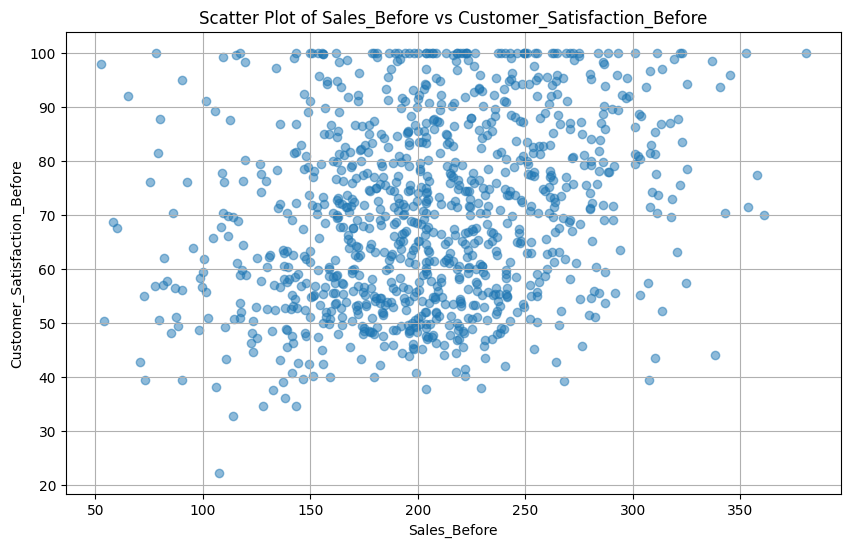

In [7]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/kaggle/input/sales-and-satisfaction/Sales_without_NaNs_v1.3.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Sample the dataset to reduce size for computation
sampled_data = data.sample(n=1000, random_state=42)

# Extract the relevant columns for the Correlation Test
sales_before = sampled_data['Sales_Before']
customer_satisfaction_before = sampled_data['Customer_Satisfaction_Before']

# Check normality of both variables
normality_test_sales = stats.shapiro(sales_before)
normality_test_satisfaction = stats.shapiro(customer_satisfaction_before)

print("\nNormality Test (Shapiro-Wilk) for Sales_Before:")
print(f"p-value: {normality_test_sales.pvalue:.4f}")
print("\nNormality Test (Shapiro-Wilk) for Customer_Satisfaction_Before:")
print(f"p-value: {normality_test_satisfaction.pvalue:.4f}")

# Perform the appropriate correlation test based on normality
if normality_test_sales.pvalue > 0.05 and normality_test_satisfaction.pvalue > 0.05:
    # Perform Pearson Correlation
    correlation_coefficient, p_value = stats.pearsonr(sales_before, customer_satisfaction_before)
    test_used = "Pearson Correlation"
else:
    # Perform Spearman's Rank Correlation
    correlation_coefficient, p_value = stats.spearmanr(sales_before, customer_satisfaction_before)
    test_used = "Spearman's Rank Correlation"

# Display the results of the correlation test
print(f"\n{test_used} Results:")
print(f"Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpret the p-value
alpha = 0.05
print(f"\nSignificance Level: {alpha}")
if p_value < alpha:
    print(f"Conclusion: Reject the null hypothesis. There is a significant correlation between Sales_Before and Customer_Satisfaction_Before (using {test_used}).")
else:
    print(f"Conclusion: Fail to reject the null hypothesis. There is no significant correlation between Sales_Before and Customer_Satisfaction_Before (using {test_used}).")

# Plot a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sales_before, customer_satisfaction_before, alpha=0.5)
plt.title('Scatter Plot of Sales_Before vs Customer_Satisfaction_Before')
plt.xlabel('Sales_Before')
plt.ylabel('Customer_Satisfaction_Before')
plt.grid(True)
plt.show()


---
## Thank You for Exploring This Notebook!


If you have any questions, suggestions, or just want to discuss any of the topics further, please don't hesitate to reach out or leave a comment. Your feedback is not only welcome but also invaluable!

Happy analyzing, and stay curious!

---